# Classifying Amazon Reviews

## Buisness Understanding

## Data Understanding

## Data Preparation

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For working with dictionaries
import collections
import operator

# For text cleaning
import re
import math
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

# WordCloud Visualization
from wordcloud import WordCloud

# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
# Term Features Matrix + Clustering
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fmartinezflores\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Extraction

##### This data set has been downloaded from the Amazon ficial web site

In [2]:
amazon_reviews_df = pd.read_table('C:/Users/fmartinezflores/Documents/Flatiron/DS-Deloitte-1003-c3/ClusteringAmazonReviews_2/ClusteringAmazonReviews/amazon_alexa.tsv')


amazon_reviews_df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
# Data frame overview. Column information, name-data type.
amazon_reviews_df.info()

# Counting missing values
amazon_reviews_df.isna().sum()

# Removing duplicate records
amazon_reviews_df = amazon_reviews_df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


#### Reviews Overview

In [4]:
_reviews = amazon_reviews_df['verified_reviews']

for i in range(10):
    print(_reviews[i])
    print('--------------')
  

Love my Echo!
--------------
Loved it!
--------------
Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.
--------------
I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
--------------
Music
--------------
I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
--------------
Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be 

### Cleaning

##### I use two different functions for cleaning, one for creating the vocabulary and other to create a new column in the data frame, this is beacause to work with the clustering algorithm I have to join all my words keeping them in Pandas Series format, in case of the vocabulary I just need a list of words

In [5]:
#  Getting rid of stop words and also removing short or long words. 
# This function cleans one word at a time from a set of words, in this case a "review".
def cleaning_revs(word, stop_words):
    word = word.lower()
    words = re.findall('[a-záéíóúüñ]+', word)# Making sure synopsis words dont have a-záéíóúüñ 
    new_words = [w for w in words if ((not w in stop_words) and len(w)>=3 and len(w)<=24)] # Keeping only words ->
    return new_words 

# Function that joins all the cleaned words to use them in a 
def joining_revs(word,stop_words):
    clean_words = cleaning_revs(word, stop_words)
    vocabulary = " ".join(clean_words)
    return vocabulary       

# Function that cleans one review at a time by calling the above function 
# it returns a "Vocabulary", this is a list of lists, each list contains all words in a review
def clean_each_review(review):
        return joining_revs(review.strip(),s_w)

s_w = stopwords.words('english')

# More words that we can ignore to refine our vocabulary 
s_w.extend(['echo','alexa','amazon','dot','purchased','one', 'two','zzzzzzz','zzzz', 'device', 'thing'])

#### Creating new column in df with the cleaned reviews.

In [6]:
amazon_reviews_df['cleaned_reviews'] = amazon_reviews_df['verified_reviews'].apply(lambda r: clean_each_review(r))

In [7]:
clean_reviews = amazon_reviews_df['cleaned_reviews']

for i in range(10):
    print( clean_reviews[i])
    print('--------------')

love
--------------
loved
--------------
sometimes playing game answer question correctly says got wrong answers like able turn lights away home
--------------
lot fun old learns dinosaurs control lights play games like categories nice sound playing music well
--------------
music
--------------
received gift needed another bluetooth something play music easily accessible found smart speaker wait see else
--------------
without cellphone cannot use many features ipad see use great alarm almost deaf hear alarm bedroom living room reason enough keep fun ask random questions hear response seem smartbon politics yet
--------------
think working getting every room house really like features offer specifily playing music echos controlling lights throughout house
--------------
looks great
--------------
love listened songs heard since childhood get news weather information great
--------------


### Analysing 

#### Count Ratings

Text(0.5, 1.0, 'Raitings')

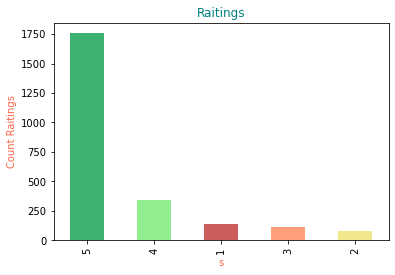

In [8]:
# Plotting
amazon_reviews_df['rating'].value_counts().plot(kind='bar', 

                                                color=['mediumseagreen','lightgreen', 'indianred', 'lightsalmon',  'khaki']);
# Graph attributes
plt.xlabel('s', color='tomato')
plt.ylabel('Count Raitings', color='tomato')
plt.title('Raitings', color='teal')

#### Count Feedback

Text(0.5, 1.0, 'Feedback')

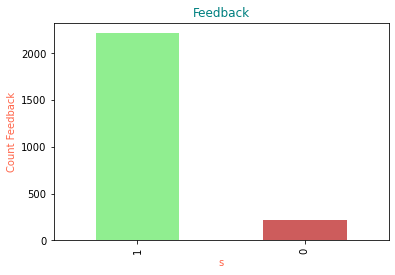

In [9]:
# Plotting
amazon_reviews_df['feedback'].value_counts().plot(kind='bar', color=['lightgreen', 'indianred']);

# Graph attributes
plt.xlabel('s', color='tomato')
plt.ylabel('Count Feedback', color='tomato')
plt.title('Feedback', color='teal')

#### Ratings By Date

In [12]:
# Changing string date to Date
amazon_reviews_df['date'] = pd.to_datetime(amazon_reviews_df['date'])

Text(0.5, 1.0, 'Ratings By Date')

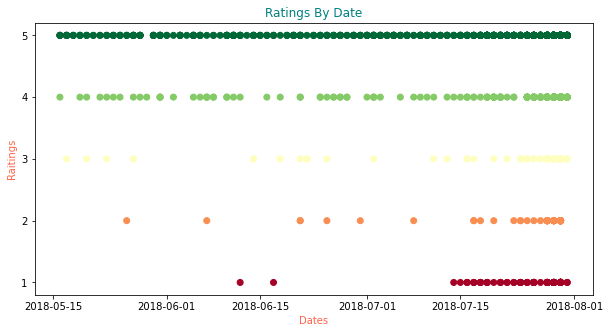

In [13]:
# Visualizing data
dates = amazon_reviews_df['date'].sort_values()
ratings = amazon_reviews_df['rating']

# Graph attributes
plt.figure(figsize=(10,5))
plt.yticks([1, 2, 3, 4, 5])
plt.scatter(dates, ratings, 
         c = ratings,
         cmap = 'RdYlGn')

plt.xlabel('Dates', color='tomato')
plt.ylabel('Raitings', color='tomato')
plt.title('Ratings By Date', color='teal')

#### Bad Reviews

<AxesSubplot:xlabel='variation'>

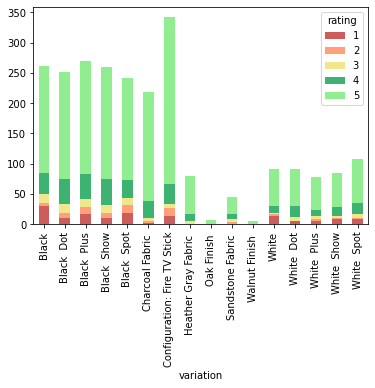

In [38]:
# Reviews by variation

# Visualizing data
amazon_reviews_df.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         color = ['indianred','lightsalmon','khaki','mediumseagreen','lightgreen'])

In [23]:
# Bad reviews from 
revs_07_15 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-06-15') & (amazon_reviews_df['date'] <= '2018-08-01')]
bad_revs_07_15 = revs_07_15.loc[(amazon_reviews_df['rating'] <= 3) ]
bad_reviews = bad_revs_07_15['verified_reviews']

#bad_revs_05_15.count()
#main_movie_info.loc[(main_movie_info['Years'] >= 1920) & (main_movie_info['Years'] <= 1929)]

In [15]:
"""
for i in bad_reviews:
    print(i)
    print('--------------')
"""

"\nfor i in bad_reviews:\n    print(i)\n    print('--------------')\n"

In [24]:
"""
# Visualizing data
dates = amazon_reviews_df['date'].sort_values()
ratings = amazon_reviews_df['rating']

# Graph attributes
plt.figure(figsize=(10,5))

plt.xlabel('Dates')
plt.ylabel('Raitings')
plt.title('Ratings By Date')

plt.yticks([1, 2, 3, 4, 5])

# Plotting
plt.plot(dates, ratings, marker = 'o', markerfacecolor = 'cornflowerblue', color = 'lightsteelblue')

# Graph attributes
plt.figure(figsize=(10,5))
plt.yticks([1, 2, 3, 4, 5])
plt.scatter(dates, ratings, 
         c = ratings,
         cmap = 'YlGnBu')

"""
#amazon_reviews_df['variation'].unique()
#dates = amazon_reviews_df['date']
#amazon_reviews_df.style.format({"date": lambda t: t.strftime("%m/%Y")})
#amazon_reviews_df = amazon_reviews_df.sort_values('date', ascending=True)

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

## Modeling

## Evaluation

## Conclusion